# Initial Data Analysis

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### CO2 Data (NOAA Mauna Loa)

In [2]:
co2_data = pd.read_csv('data/co2_mm_mlo.csv', comment='#')  # Skip lines starting with #

# Display first few rows
print(co2_data.head(10))
print(f"\nShape: {co2_data.shape}")
print(f"Date range: {co2_data['year'].min()} to {co2_data['year'].max()}")

# Check for missing values
print(f"Missing values: {(co2_data['average'].isna()).sum()}")

   year  month  decimal date  average  deseasonalized  ndays  sdev   unc
0  1958      3     1958.2027   315.71          314.44     -1 -9.99 -0.99
1  1958      4     1958.2877   317.45          315.16     -1 -9.99 -0.99
2  1958      5     1958.3699   317.51          314.69     -1 -9.99 -0.99
3  1958      6     1958.4548   317.27          315.15     -1 -9.99 -0.99
4  1958      7     1958.5370   315.87          315.20     -1 -9.99 -0.99
5  1958      8     1958.6219   314.93          316.21     -1 -9.99 -0.99
6  1958      9     1958.7068   313.21          316.11     -1 -9.99 -0.99
7  1958     10     1958.7890   312.42          315.41     -1 -9.99 -0.99
8  1958     11     1958.8740   313.33          315.21     -1 -9.99 -0.99
9  1958     12     1958.9562   314.67          315.43     -1 -9.99 -0.99

Shape: (814, 8)
Date range: 1958 to 2025
Missing values: 0


In [3]:
# Create proper datetime column
co2_data['date'] = pd.to_datetime(co2_data[['year', 'month']].assign(day=1))

# Rename co2
co2_data = co2_data.rename(columns={'average': 'co2_ppm'})

# Keep only what I need
co2_clean = co2_data[['date', 'year', 'month', 'co2_ppm']].copy()

print("Cleaned CO2 Data:")
print(co2_clean.tail())
print(f"Columns: {co2_clean.columns}")

Cleaned CO2 Data:
          date  year  month  co2_ppm
809 2025-08-01  2025      8   425.48
810 2025-09-01  2025      9   424.37
811 2025-10-01  2025     10   424.87
812 2025-11-01  2025     11   426.46
813 2025-12-01  2025     12   427.49
Columns: Index(['date', 'year', 'month', 'co2_ppm'], dtype='object')


In [ ]:
# Co2 levels 2020-2025 & difference
co2_2025 = co2_clean['co2_ppm'].iloc[-1]
co2_2020 = co2_clean.loc[
    co2_clean['date'] == '2020-01-01',
    'co2_ppm'
].iloc[0]
diff_ppm = co2_2025 - co2_2020
GTCO2_PER_PPM = 7.814
diff_gt = diff_ppm * GTCO2_PER_PPM

print(f"CO₂ level on Dec 2025: {co2_2025:.2f} ppm")
print(f"CO₂ level on Jan 2020: {co2_2020:.2f} ppm")
print(f'Difference: {diff_ppm:.2f} ppm / {diff_gt:.2f} Gt')

CO₂ level on Dec 2025: 427.49 ppm
CO₂ level on Jan 2020: 413.59 ppm
Difference: 13.90 ppm / 108.61 Gt


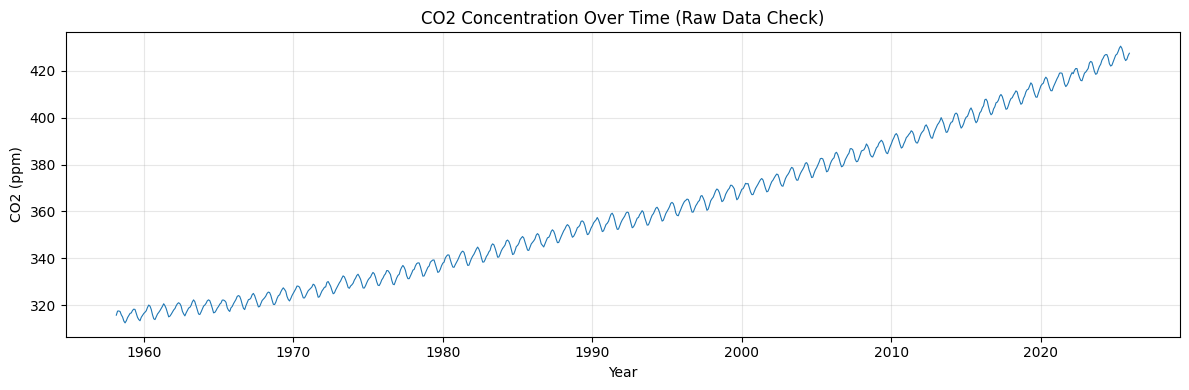

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(co2_clean['date'], co2_clean['co2_ppm'], linewidth=0.8)
plt.title('CO2 Concentration Over Time (Raw Data Check)')
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Temperature Data (Berkley Earth)

In [20]:
# Load data
temp_data = pd.read_csv('data/Land_and_Ocean_complete.txt',
                        comment='%', sep='\s+', header=None,
                        names=['Year', 'Month', 'Anomaly_monthly', 'Unc_monthly', 
                               'Anomaly_annual', 'Unc_annual', 'Anomaly_5year', 'Unc_5year', 
                               'Anomaly_10year', 'Unc_10year', 'Anomaly_20year', 'Unc_20year']
                        )

print(temp_data.tail())

      Year  Month  Anomaly_monthly  Unc_monthly  Anomaly_annual  Unc_annual  \
4195  2024      8            1.257        0.032             NaN         NaN   
4196  2024      9            1.138        0.036             NaN         NaN   
4197  2024     10            1.182        0.042             NaN         NaN   
4198  2024     11            1.169        0.057             NaN         NaN   
4199  2024     12            1.138        0.049             NaN         NaN   

      Anomaly_5year  Unc_5year  Anomaly_10year  Unc_10year  Anomaly_20year  \
4195            NaN        NaN             NaN         NaN             NaN   
4196            NaN        NaN             NaN         NaN             NaN   
4197            NaN        NaN             NaN         NaN             NaN   
4198            NaN        NaN             NaN         NaN             NaN   
4199            NaN        NaN             NaN         NaN             NaN   

      Unc_20year  
4195         NaN  
4196         NaN  

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\linas\AppData\Local\Temp\ipykernel_30084\2128191890.py:3: SyntaxWarning: invalid escape sequence '\s'
  comment='%', sep='\s+', header=None,


In [23]:
# Create date column
temp_data['date'] = pd.to_datetime(temp_data[['Year', 'Month']].assign(day=1))

# Check for NaNs in monthly anomaly
print(f"NaN values im monthly anomaly: {temp_data['Anomaly_monthly'].isna().sum()}\n")

print(temp_data.head())
print(temp_data.tail())

NaN values im monthly anomaly: 0

   Year  Month  Anomaly_monthly  Unc_monthly  Anomaly_annual  Unc_annual  \
0  1850      1           -0.753        0.365             NaN         NaN   
1  1850      2           -0.202        0.416             NaN         NaN   
2  1850      3           -0.367        0.373             NaN         NaN   
3  1850      4           -0.596        0.324             NaN         NaN   
4  1850      5           -0.619        0.267             NaN         NaN   

   Anomaly_5year  Unc_5year  Anomaly_10year  Unc_10year  Anomaly_20year  \
0            NaN        NaN             NaN         NaN             NaN   
1            NaN        NaN             NaN         NaN             NaN   
2            NaN        NaN             NaN         NaN             NaN   
3            NaN        NaN             NaN         NaN             NaN   
4            NaN        NaN             NaN         NaN             NaN   

   Unc_20year       date  
0         NaN 1850-01-01  
1   

Current temperature anomaly: 1.138°C


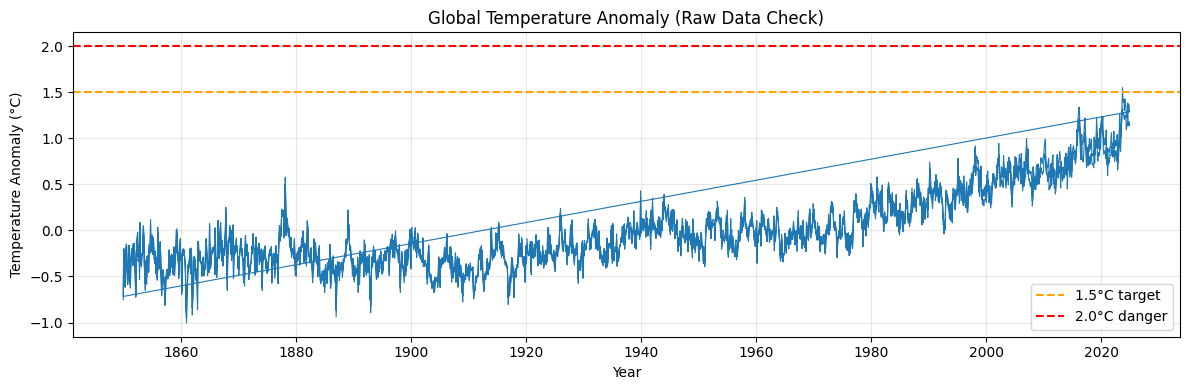

In [8]:
print(f"Current temperature anomaly: {temp_data['Anomaly_monthly'].iloc[-1]}°C")

# Quick visualization
plt.figure(figsize=(12, 4))
plt.plot(temp_data['date'], temp_data['Anomaly_monthly'], linewidth=0.8)
plt.axhline(y=1.5, color='orange', linestyle='--', label='1.5°C target')
plt.axhline(y=2.0, color='red', linestyle='--', label='2.0°C danger')
plt.title('Global Temperature Anomaly (Raw Data Check)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Sea level data (CSIRO)

In [ ]:
# Load data
sea_level = pd.read_csv('data/CSIRO_Recons_gmsl_mo_2015.csv')
    
# data check
print(sea_level.head())
print(f"\nColumns: {sea_level.columns.tolist()}")

# find where sea_level = 0
sea_level[sea_level['GMSL'] == 0]
idx_closest = (sea_level['GMSL'] - 0).abs().idxmin()
idx_closest
sea_level.loc[idx_closest]

       Time   GMSL  GMSL uncertainty
0  1880-Jan -183.0              24.2
1  1880-Feb -171.1              24.2
2  1880-Mar -164.3              24.2
3  1880-Apr -158.2              24.2
4  1880-May -158.7              24.2

Columns: ['Time', 'GMSL', 'GMSL uncertainty']


Time                1990-Jun
GMSL                    -0.0
GMSL uncertainty         6.5
Name: 1325, dtype: object

In [ ]:
# Extract datetime columns
sea_level['Date'] = pd.to_datetime(sea_level['Time'])
sea_level['Year'] = sea_level['Date'].dt.year
sea_level['Month'] = sea_level['Date'].dt.month
print(f"Columns: {sea_level.columns}")
sea_level.tail()

Columns: Index(['Time', 'GMSL', 'GMSL uncertainty', 'Date', 'Year', 'Month'], dtype='object')


C:\Users\linas\AppData\Local\Temp\ipykernel_30084\2109074055.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sea_level['Date'] = pd.to_datetime(sea_level['Time'])


,Time,GMSL,GMSL uncertainty,Date,Year,Month
1603,2013-Aug,71.6,8.8,2013-08-01,2013,8
1604,2013-Sep,68.8,8.8,2013-09-01,2013,9
1605,2013-Oct,66.4,8.9,2013-10-01,2013,10
1606,2013-Nov,59.7,9.0,2013-11-01,2013,11
1607,2013-Dec,58.5,9.0,2013-12-01,2013,12


NaN values: 0
Date range: 1880 to 2013
Sea level rise since 1880: 241.5mm


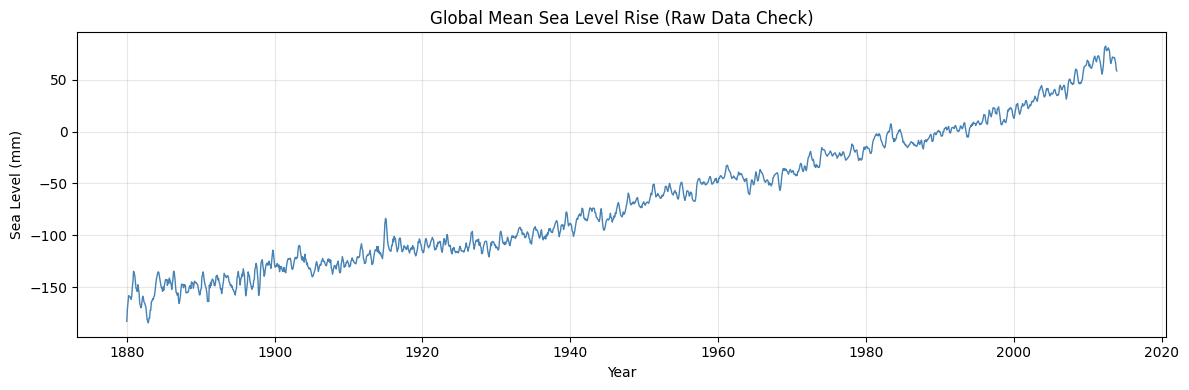

In [ ]:
print(f"NaN values in GMSL: {sea_level['GMSL'].isna().sum()}")
print(f"Date range: {sea_level['Year'].min()} to {sea_level['Year'].max()}")
print(f"Sea level rise since {sea_level['Year'].min()}: {sea_level['GMSL'].iloc[-1] - sea_level['GMSL'].iloc[0]}mm")

plt.figure(figsize=(12, 4))
plt.plot(sea_level['Date'], sea_level['GMSL'], linewidth=1, color='steelblue')
plt.title('Global Mean Sea Level Rise (Raw Data Check)')
plt.xlabel('Year')
plt.ylabel('Sea Level (mm)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:
# Calculate current rate of rise
recent_years = sea_level[sea_level['Year'] >= 1993]  # Satellite era
if len(recent_years) > 1:
    years_elapsed = recent_years['Year'].iloc[-1] - recent_years['Year'].iloc[0]
    level_change = recent_years['GMSL'].iloc[-1] - recent_years['GMSL'].iloc[0]
    rate_per_year = level_change / years_elapsed
    print(f"Rate of sea level rise (1993-present): {rate_per_year:.2f} mm/year")   

Rate of sea level rise (1993-present): 2.79 mm/year


### Carbon Budget (Global Carbon Budget)

In [ ]:
# Load data
budget = pd.read_excel(r'data\Global_Carbon_Budget_2025_v0.3.xlsx', skiprows=12)
budget
# didn't work as planned, copied important columns manually into new excel file, see budget2

,"2019: Friedlingstein Pierre, Matthew W. Jones, Michael O’Sullivan, Robbie M. Andrew, Judith Hauck, Glen P. Peters, Wouter Peters, Julia Pongratz, Stephen Sitch, Corinne Le Quéré, Dorothee C. E. Bakker, Josep G. Canadell, Philippe Ciais, Rob Jackson, Peter Anthoni, Leticia Barbero, Ana Bastos, Vladislav Bastrikov, Meike Becker, Laurent Bopp, Erik Buitenhuis, Naveen Chandra, Frédéric Chevallier, Louise P. Chini, Kim I. Currie, Richard A. Feely, Marion Gehlen, Dennis Gilfillan, Thanos Gkritzalis, Daniel S. Goll, Nicolas Gruber, Sören Gutekunst, Ian Harris, Vanessa Haverd, Richard A. Houghton, George Hurtt, Tatiana Ilyina, Atul K. Jain, Emilie Joetzjer, Jed O. Kaplan, Etsushi Kato, Kees Klein Goldewijk, Jan Ivar Korsbakken, Peter Landschützer, Siv K. Lauvset, Nathalie Lefèvre, Andrew Lenton, Sebastian Lienert, Danica Lombardozzi, Gregg Marland, Patrick C. McGuire, Joe R. Melton, Nicolas Metzl, David R. Munro, Julia E. M. S. Nabel, Shin-Ichiro Nakaoka, Craig Neill, Abdirahman M. Omar, Tsuneo Ono, Anna Peregon, Denis Pierrot, Benjamin Poulter, Gregor Rehder, Laure Resplandy, Eddy Robertson, Christian Rödenbeck, Roland Séférian, Jörg Schwinger, Naomi Smith, Pieter P. Tans, Hanqin Tian, Bronte Tilbrook, Francesco N Tubiello, Guido R. van der Werf, Andrew J. Wiltshire, Sönke Zaehle. Global Carbon Budget 2019, Earth Syst. Sci. Data, 2019. https://doi.org/10.5194/essd-11-1783-2019"
0,"2018b: Le Quéré Corinne, Robbie M. Andrew, Pie..."
1,"2018a: Le Quéré, Corinne, Robbie M. Andrew, Pi..."
2,"2017: Peters, G.P., C. Le Quéré, R.M. Andrew, ..."
3,"2016: Le Quéré, C., Andrew, R. M., Canadell, J..."
4,"2015: Le Quéré, C, R Moriarty, RM Andrew, JG C..."
5,"2015: Jackson, R. B., Canadell, J. G., Le Quér..."
6,"2014: Le Quéré, C, R Moriarty, R M Andrew, G P..."
7,"2014: Friedlingstein, P., Andrew, R. M., Rogel..."
8,"2013: Le Quéré, C, G P Peters, R J Andres, R M..."
9,"2012: Le Quéré, C, R J Andres, T Boden, T Conw..."


In [ ]:
# Load cleaned data
budget2 = pd.read_excel(r'data\Carbon_Budget.xlsx')
# Rename and drop columns
budget2 = budget2.rename(columns={'Year': 'year', 'fossil emissions excluding carbonation': 'fossil', 'land-use change emissions': 'land', 'cement carbonation sink': 'sink'})
budget2 = budget2.drop(columns={'atmospheric growth', 'ocean sink', 'land sink', 'budget imbalance'})
budget2

,year,fossil,land,sink
0,1959,2.416788,2.372480,0.013423
1,1960,2.561941,2.077120,0.014643
2,1961,2.569593,2.082467,0.015615
3,1962,2.660273,1.948253,0.016747
4,1963,2.802068,1.897743,0.017819
...,...,...,...,...
61,2020,9.595587,1.232680,0.213648
62,2021,10.061917,1.271043,0.224417
63,2022,10.242296,1.306057,0.220896
64,2023,10.396846,1.295183,0.227371


In [ ]:
# Calculate budget
years = [2020, 2021, 2022, 2023, 2024]

budget_sel = budget2.loc[budget2['year'].isin(years)].copy()

budget_sel['budget'] = (
    budget_sel['fossil']
    + budget_sel['land']
    - budget_sel['sink']
)


budget_sel = budget_sel.sort_values('year').reset_index(drop=True)
budget_sel

,year,fossil,land,sink,budget
0,2020,9.595587,1.232680,0.213648,10.614618
1,2021,10.061917,1.271043,0.224417,11.108543
2,2022,10.242296,1.306057,0.220896,11.327457
3,2023,10.396846,1.295183,0.227371,11.464659
4,2024,10.534546,1.251503,0.224291,11.561759


In [ ]:
# add predicted budget for 2025
budget_2025 = {
    'year': 2025,
    'fossil': np.nan,
    'land': np.nan,
    'sink': np.nan,
    'budget': 11.5
}

budget_sel = pd.concat(
    [budget_sel, pd.DataFrame([budget_2025])],
    ignore_index=True
)
budget_sel

,year,fossil,land,sink,budget
0,2020,9.595587,1.232680,0.213648,10.614618
1,2021,10.061917,1.271043,0.224417,11.108543
2,2022,10.242296,1.306057,0.220896,11.327457
3,2023,10.396846,1.295183,0.227371,11.464659
4,2024,10.534546,1.251503,0.224291,11.561759
5,2025,NaN,NaN,NaN,11.500000


In [ ]:
# calculate total budget from 2020-2025
total_budget = budget_sel['budget'].sum()
total_budget_co2 = total_budget * 3.664
print(f'Total Budget in GtC: {total_budget:.2f}')
print(f'Total Budget in GtCo2: {total_budget_co2:.2f}')

Total Budget in GtC: 67.58
Total Budget in GtCo2: 247.60
